**Lab 5 Overfitting - Regularization**

**Imports**

In [1]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

**Presenting dictionary**

In [2]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


**Short Analyse of dataset**

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Converting Boston data to pandas**

In [4]:
import pandas as pd 
import numpy as np

In [5]:
bos_df = pd.DataFrame(boston.data)
print(bos_df.head())
bos_df_target = pd.DataFrame(boston.target)
print(bos_df_target.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


**Ex.1 Split train-test dataset**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(bos_df, bos_df_target, test_size=0.2, random_state=42)

**Correctness check of splitted datasets**

In [7]:
print("-------- Data set ---------")
print(float(X_train.shape[0]) / float(bos_df.shape[0]))
print(float(X_test.shape[0]) / float(bos_df.shape[0]))
print("-------- Target set ---------")
print(float(X_train.shape[0]) / float(bos_df.shape[0]))
print(float(X_test.shape[0]) / float(bos_df.shape[0]))

-------- Data set ---------
0.7984189723320159
0.2015810276679842
-------- Target set ---------
0.7984189723320159
0.2015810276679842


**Ex.2 Linear regression**

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
LinRegModel = LinearRegression()
LinRegModel.fit(X_train, Y_train)

LinearRegression()

In [10]:
Y_pred = LinRegModel.predict(X_test)

In [11]:
from matplotlib import pyplot as plt 

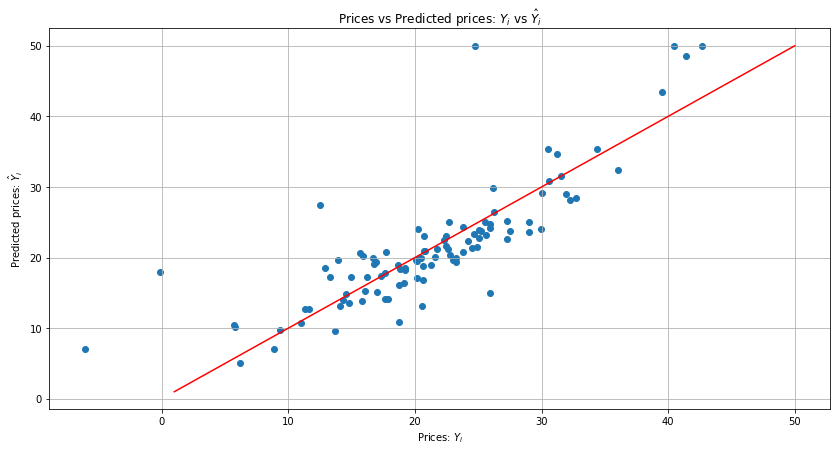

In [12]:
plt.figure(num=1, figsize=[14, 7])
plt.scatter(Y_pred, Y_test)
plt.plot([1, 2, 3, 50], [1, 2, 3, 50], c='r') #Ideal model
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.grid()
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

**Ex. 3: To check the level of error of a model calculate the Mean Squared**


In [14]:
MSE = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {MSE}")

Mean Squared Error: 24.291119474973616


**Ex. 4: Calculate the model.score. Check what it is for linear problems**


In [15]:
Score = LinRegModel.score(X_train, Y_train)
print(f"Model score: {Score}")

Model score: 0.7508856358979672


**Data Normalization**

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [17]:
Scaler = StandardScaler()
polynomial_features = PolynomialFeatures(degree=2)

In [18]:
X_train_scaled = Scaler.fit_transform(X_train)
X_train_poly = polynomial_features.fit_transform(X_train_scaled)

In [19]:
X_test_scaled = Scaler.transform(X_test)
X_test_poly = polynomial_features.fit_transform(X_test_scaled)

In [20]:
X_train_poly.shape

(404, 105)

In [21]:
LinRegModel2 = LinearRegression()
LinRegModel2.fit(X_train_poly, Y_train)

LinearRegression()

In [22]:
Y_pred2 = LinRegModel2.predict(X_test_poly)

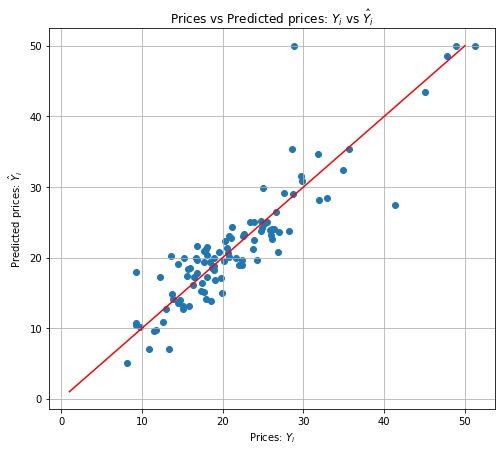

In [23]:
plt.figure(num=1, figsize=[8, 7])
plt.scatter(Y_pred2, Y_test)
plt.plot([1, 2, 3, 50], [1, 2, 3, 50], c='r') #Ideal model
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.grid()
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

**Comparisson**

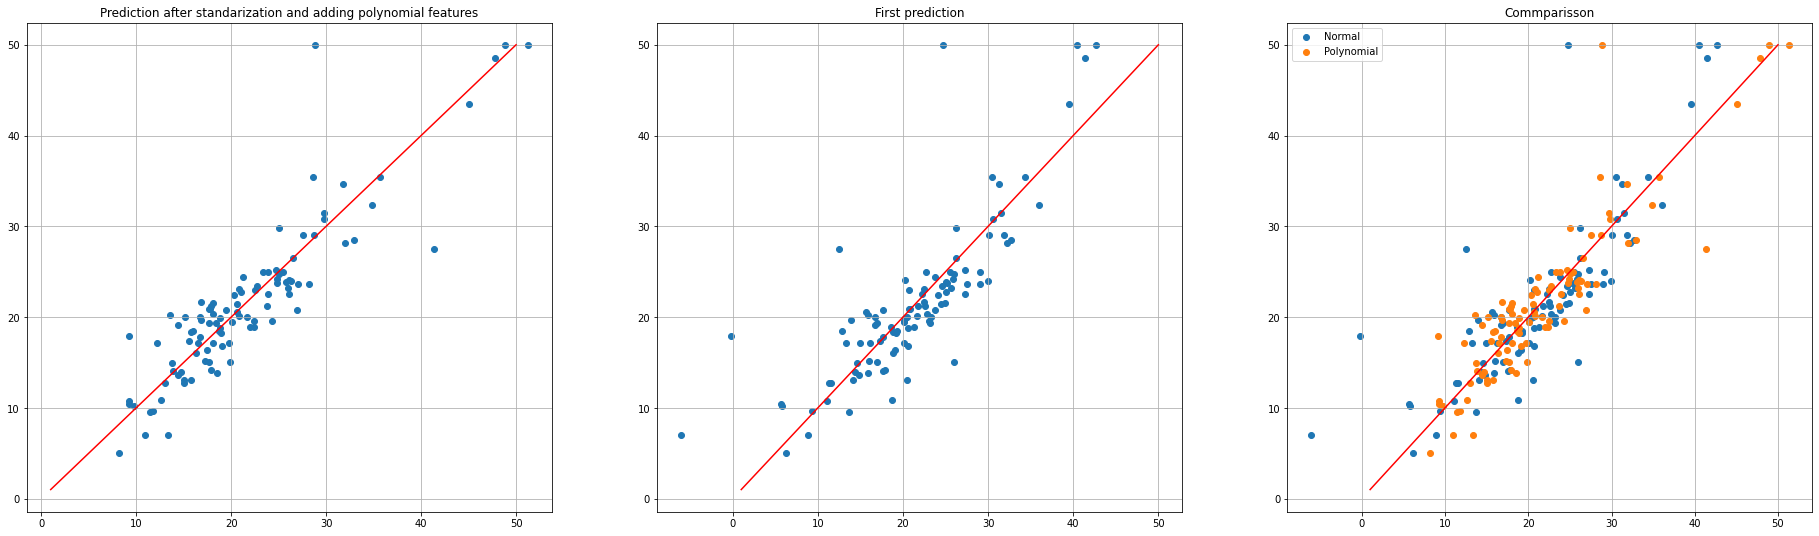

In [24]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches([32,9])
ax[0].scatter(Y_pred2, Y_test)
ax[0].set_title("Prediction after standarization and adding polynomial features")
ax[0].plot([1, 2, 3, 50], [1, 2, 3, 50], c='r')
ax[0].grid()

ax[1].scatter(Y_pred, Y_test)
ax[1].set_title("First prediction")
ax[1].plot([1, 2, 3, 50], [1, 2, 3, 50], c='r')
ax[1].grid()

ax[2].scatter(Y_pred, Y_test, label="Normal")
ax[2].scatter(Y_pred2, Y_test, label="Polynomial")
ax[2].set_title("Commparisson")
ax[2].plot([1, 2, 3, 50], [1, 2, 3, 50], c='r')
ax[2].grid()
ax[2].legend()

Po standaryzacji i regularyzacji uzyskujemy znacząco mniejszy MSE. Wykresy pokazują również, że wartości przewidywane są bliskie prawdzie oraz występuje o wiele mniej predykcji znacząco odbiegających od rzeczywistości.

In [25]:
MSE = mean_squared_error(Y_test, Y_pred2)
print(f"Mean Squared Error: {MSE}")

Mean Squared Error: 14.264843297210959


In [26]:
Score = LinRegModel2.score(X_train_poly, Y_train)
print(f"Model score: {Score}")

Model score: 0.9409311402926827


**Ex. 5: Lasso**

In [27]:
from sklearn.linear_model import Ridge, Lasso

In [28]:
from sklearn import linear_model
alphas = [10**i for i in range(-6, 6, 1)]
acc_list = list()
acc_list_train = list()
#Test
for alpha in alphas:
  Lasso_Model = linear_model.Lasso(alpha=alpha)
  Lasso_Model.fit(X_train_poly, Y_train)
  acc_list.append(Lasso_Model.score(X_test_poly, Y_test))

#Train
for alpha in alphas:
  Lasso_Model = linear_model.Lasso(alpha=alpha)
  Lasso_Model.fit(X_train_poly, Y_train)
  acc_list_train.append(Lasso_Model.score(X_train_poly, Y_train))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+03, tolerance: 3.510e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+03, tolerance: 3.510e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

**Test Data**

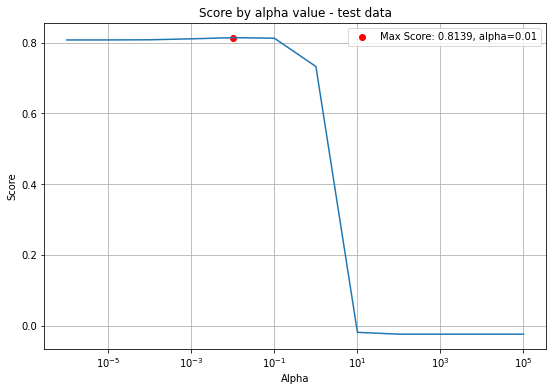

In [29]:
plt.figure(num=15, figsize=[9, 6])
plt.plot(alphas, acc_list)
plt.scatter(alphas[np.array(acc_list).argmax()], max(acc_list),c='r', label=f"Max Score: {round(max(acc_list), 4)}, alpha={alphas[np.array(acc_list).argmax()]}")
plt.title("Score by alpha value - test data")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

**Train Data**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


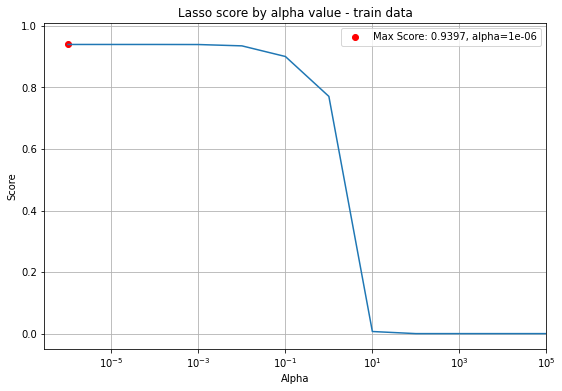

In [30]:
plt.figure(num=15, figsize=[9, 6])
plt.plot(alphas, acc_list_train)
plt.scatter(alphas[np.array(acc_list_train).argmax()], max(acc_list_train),c='r', label=f"Max Score: {round(max(acc_list_train), 4)}, alpha={alphas[np.array(acc_list_train).argmax()]}")
plt.title("Lasso score by alpha value - train data")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.xscale('log')
plt.legend()
plt.axis([-1, 100000, -0.05, 1.01])
plt.grid()
plt.show()

**Ridge**

In [31]:
alphas = [10**i for i in range(-6, 6, 1)]
acc_list2 = list()
acc_list2_train = list()
#Test
for alpha in alphas:
  Ridge_Model = linear_model.Ridge(alpha=alpha)
  Ridge_Model.fit(X_train_poly, Y_train)
  acc_list2.append(Ridge_Model.score(X_test_poly, Y_test))

#Train
for alpha in alphas:
  Ridge_Model = linear_model.Ridge(alpha=alpha)
  Ridge_Model.fit(X_train_poly, Y_train)
  acc_list2_train.append(Ridge_Model.score(X_train_poly, Y_train))

**Test data**

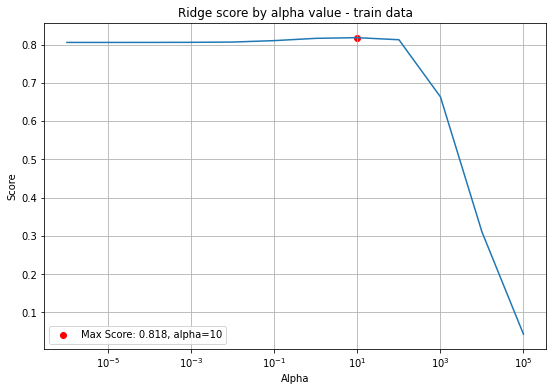

In [32]:
plt.figure(num=15, figsize=[9, 6])
plt.plot(alphas, acc_list2)
plt.scatter(alphas[np.array(acc_list2).argmax()], max(acc_list2),c='r', label=f"Max Score: {round(max(acc_list2), 4)}, alpha={alphas[np.array(acc_list2).argmax()]}")
plt.title("Ridge score by alpha value - train data")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

**Train data**

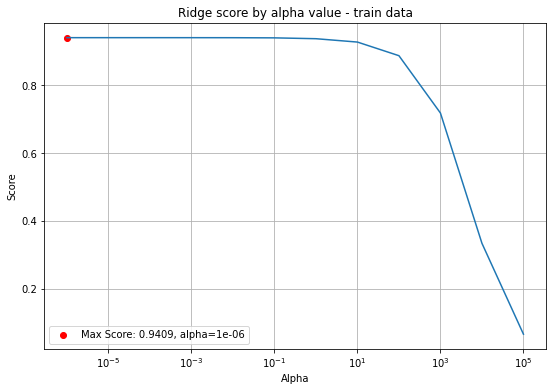

In [33]:
plt.figure(num=15, figsize=[9, 6])
plt.plot(alphas, acc_list2_train)
plt.scatter(alphas[np.array(acc_list2_train).argmax()], max(acc_list2_train),c='r', label=f"Max Score: {round(max(acc_list2_train), 4)}, alpha={alphas[np.array(acc_list2_train).argmax()]}")
plt.title("Ridge score by alpha value - train data")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

**Regularization for logistic regression**

In [34]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

**Ex.1 - checking missing values and filling them with mean**

In [35]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=["target"])
df_target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
df.fillna(df.mean())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [37]:
# splitting set
X_train, X_test, Y_train, Y_test = train_test_split(df, df_target, test_size=0.1, random_state=42)

**Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression 

**L1 with C=1**

In [39]:
LogModel = LogisticRegression(penalty='l1', C=1,  solver='liblinear')
LogModel.fit(X_train, Y_train)
# predicts = LogModel.predict(X_test)
LogModel.score(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9824561403508771

**L2 with different C values for test set**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

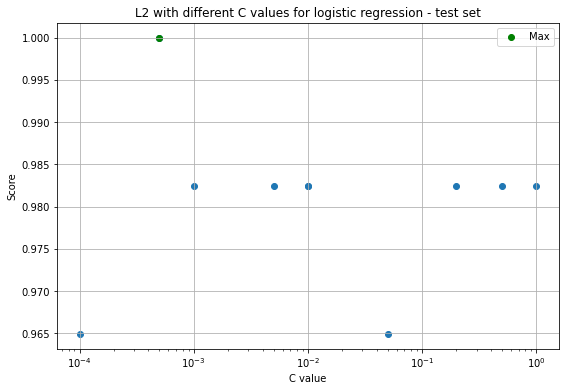

In [40]:
L2_scores = list()
c2_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.01, 0.2, 0.5, 1]
for c_2 in c2_values:
  LogModel = LogisticRegression(penalty='l2', C=c_2,  solver='liblinear')
  LogModel.fit(X_train, Y_train)
  L2_scores.append(LogModel.score(X_test, Y_test))

plt.figure(num=20, figsize=[9, 6])
plt.scatter(c2_values, L2_scores)
plt.scatter(c2_values[np.array(L2_scores).argmax()], max(L2_scores), c='g', label='Max')
plt.xlabel("C value")
plt.ylabel("Score")
plt.xscale('log')
plt.title("L2 with different C values for logistic regression - test set")
plt.grid()
plt.legend()
plt.show()

**L2 with different C values for train set**

In [41]:
LogModel = LogisticRegression(penalty='l1', C=1,  solver='liblinear')
LogModel.fit(X_train, Y_train)
# predicts = LogModel.predict(X_test)
LogModel.score(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.955078125

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

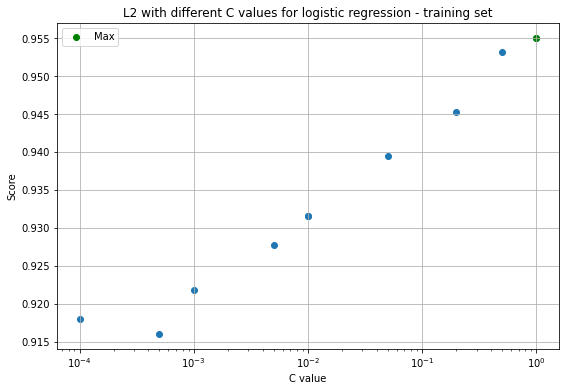

In [42]:
L2_scores = list()
c2_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.01, 0.2, 0.5, 1]
for c_2 in c2_values:
  LogModel = LogisticRegression(penalty='l2', C=c_2,  solver='liblinear')
  LogModel.fit(X_train, Y_train)
  L2_scores.append(LogModel.score(X_train, Y_train))

plt.figure(num=20, figsize=[9, 6])
plt.scatter(c2_values, L2_scores)
plt.scatter(c2_values[np.array(L2_scores).argmax()], max(L2_scores), c='g', label='Max')
plt.xlabel("C value")
plt.ylabel("Score")
plt.xscale('log')
plt.title("L2 with different C values for logistic regression - training set")
plt.grid()
plt.legend()
plt.show()

**Regularization for kNN method**

In [43]:
# importing kNN from previous laboratory
from math import sqrt
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1): # last value is ignored cause it is label 
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

def get_neighbors(train_set, test_row, num_of_neighbors: int = 3):
  distances = list()
  for train_row in train_set:
    distance = euclidean_distance(test_row, train_row)
    distances.append((train_row, distance))
  distances.sort(key=lambda row: row[1])
  neigbors = list()
  for i in range(num_of_neighbors):
    neigbors.append(distances[i][0])
  return neigbors

def predict_knn(train_set, test_row, num_of_neighbors: int = 3):
    neighbs = get_neighbors(train_set, test_row, num_of_neighbors)
    labels = [row[-1] for row in neighbs]
    prediction = max(set(labels), key=labels.count)
    return prediction

**Accuracy for different k values**

In [44]:
# knn_data = pd.DataFrame(data.data, data.target)
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [45]:
Train_set = np.column_stack((X_train, Y_train.T))

In [46]:
k_values = [1, 2, 3, 4, 5, 8, 10, 13, 21]
k_acc_list = []
for k in k_values:
  knn_correct_predicts = 0
  for i in range(X_test.shape[0]):
    test_row = X_test[i, :]
    pred = predict_knn(Train_set, test_row, num_of_neighbors=k)
    if pred == Y_test[i]:
      knn_correct_predicts += 1
  k_acc_list.append(knn_correct_predicts/X_test.shape[0])

**Plotting accuracy of kNN for specific 'k' value**

[]

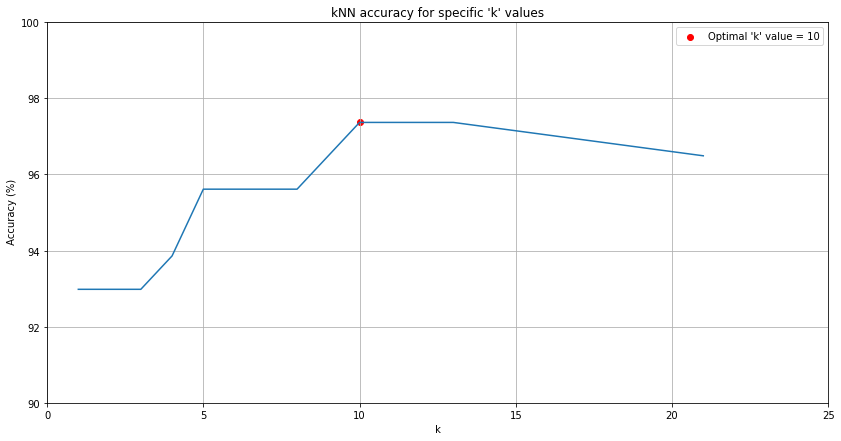

In [47]:
plt.figure(num=34, figsize=[14, 7])
plt.plot(k_values, np.array(k_acc_list)*100) # in % 
plt.scatter(k_values[np.array(k_acc_list).argmax()], max(k_acc_list) * 100, c='r', label=f"Optimal 'k' value = {k_values[np.array(k_acc_list).argmax()]}")
plt.xlabel(" k ")
plt.ylabel(" Accuracy (%)")
plt.title("kNN accuracy for specific 'k' values")
plt.grid()
plt.axis([0, 25, 90, 100])
plt.legend()
plt.plot()

In [48]:
print(f"The highest accuracy is reached for k = 10")

The highest accuracy is reached for k = 10


**Decision trees optimization**

In [53]:
from sklearn import tree
import numpy as np

In [64]:
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)
accuracy_scaled_list = list()
accuracy_list = list()

score_scaled_list = list()
score_list = list()

accuracy_scaled_list = list()
accuracy_list = list()

for depth in range(1, 25):
  clf_scaled = tree.DecisionTreeClassifier(max_depth=depth)
  clf_scaled.fit(X_train_scaled, Y_train)
  score_scaled_list.append(clf_scaled.score(X_test_scaled, Y_test))  
  pred_scaled = clf_scaled.predict(X_test_scaled)
  accuracy_scaled_list.append((Y_test.shape[0] - np.sum(np.abs(np.array(pred_scaled) - np.array(Y_test))))/ Y_test.shape[0])


  clf = tree.DecisionTreeClassifier(max_depth=depth)
  clf.fit(X_train, Y_train)
  score_list.append(clf.score(X_test, Y_test))
  pred = clf_scaled.predict(X_test_scaled)
  accuracy_list.append((Y_test.shape[0] - np.sum(np.abs(np.array(pred) - np.array(Y_test))))/ Y_test.shape[0])


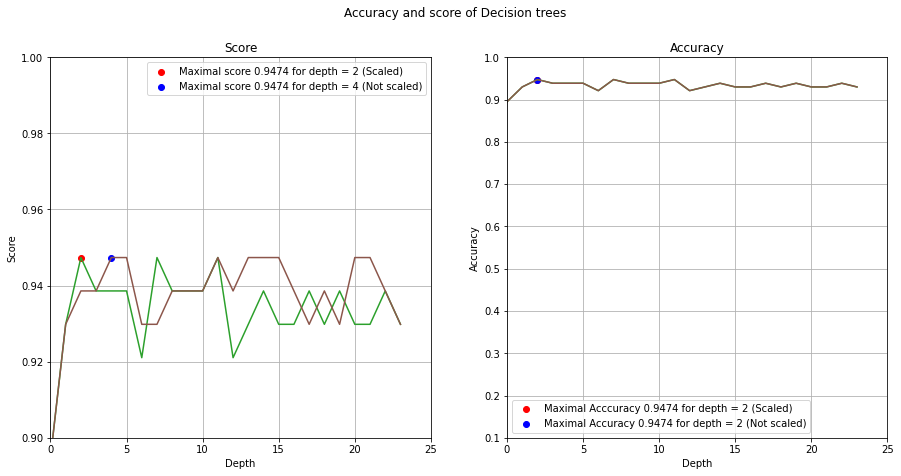

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches([15, 7])
fig.suptitle("Accuracy and score of Decision trees")
ax1.plot(*range(1, 25), score_scaled_list)
ax1.plot(*range(1, 25), score_list)
ax1.scatter(np.array(score_scaled_list).argmax(), max(score_scaled_list), c='r', label=f"Maximal score {round(max(score_scaled_list), 4)} for depth = {np.array(score_scaled_list).argmax()} (Scaled)")
ax1.scatter(np.array(score_list).argmax(), max(score_list), c='b', label=f"Maximal score {round(max(score_list), 4)} for depth = {np.array(score_list).argmax()} (Not scaled)")
ax1.set_xlabel("Depth")
ax1.set_ylabel("Score")
ax1.set_title("Score")
ax1.legend()
ax1.axis([0, 25, 0.9, 1])
ax1.grid()

ax2.plot(*range(1, 25), accuracy_scaled_list)
ax2.plot(*range(1, 25), accuracy_list)
ax2.scatter(np.array(accuracy_scaled_list).argmax(), max(accuracy_scaled_list), c='r', label=f"Maximal Acccuracy {round(max(accuracy_scaled_list), 4)} for depth = {np.array(accuracy_scaled_list).argmax()} (Scaled)")
ax2.scatter(np.array(accuracy_list).argmax(), max(accuracy_list), c='b', label=f"Maximal Accuracy {round(max(accuracy_list), 4)} for depth = {np.array(accuracy_list).argmax()} (Not scaled)")
ax2.set_xlabel("Depth")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy")
ax2.legend()
ax2.axis([0, 25, 0.1, 1])
ax2.grid()
plt.show()

**Adding regularization**

In [69]:

polynomial_features = PolynomialFeatures(degree=2)
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)
X_train_scaled = polynomial_features.fit_transform(X_train_scaled)
X_test_scaled = polynomial_features.fit_transform(X_test_scaled)
X_train = polynomial_features.fit_transform(X_train)
X_test = polynomial_features.fit_transform(X_test)

accuracy_scaled_list = list()
accuracy_list = list()

score_scaled_list = list()
score_list = list()

accuracy_scaled_list = list()
accuracy_list = list()

for depth in range(1, 25):
  clf_scaled = tree.DecisionTreeClassifier(max_depth=depth)
  clf_scaled.fit(X_train_scaled, Y_train)
  score_scaled_list.append(clf_scaled.score(X_test_scaled, Y_test))  
  pred_scaled = clf_scaled.predict(X_test_scaled)
  accuracy_scaled_list.append((Y_test.shape[0] - np.sum(np.abs(np.array(pred_scaled) - np.array(Y_test))))/ Y_test.shape[0])


  clf = tree.DecisionTreeClassifier(max_depth=depth)
  clf.fit(X_train, Y_train)
  score_list.append(clf.score(X_test, Y_test))
  pred = clf_scaled.predict(X_test_scaled)
  accuracy_list.append((Y_test.shape[0] - np.sum(np.abs(np.array(pred) - np.array(Y_test))))/ Y_test.shape[0])

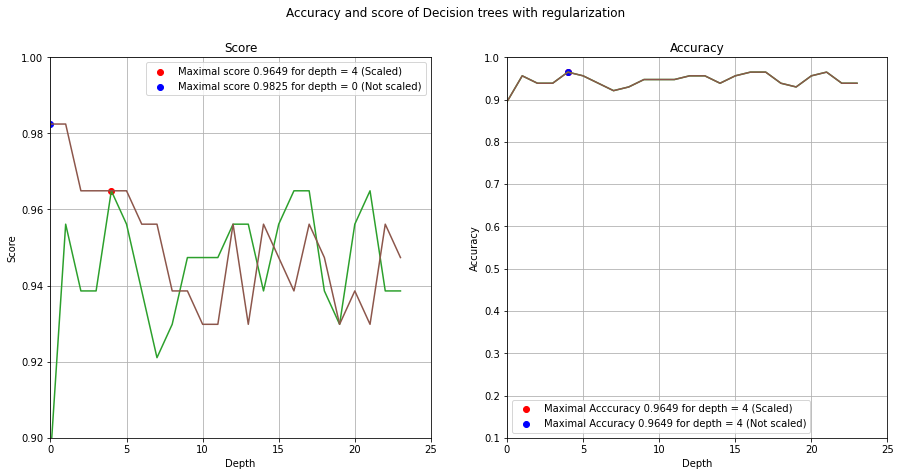

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches([15, 7])
fig.suptitle("Accuracy and score of Decision trees with regularization")
ax1.plot(*range(1, 25), score_scaled_list)
ax1.plot(*range(1, 25), score_list)
ax1.scatter(np.array(score_scaled_list).argmax(), max(score_scaled_list), c='r', label=f"Maximal score {round(max(score_scaled_list), 4)} for depth = {np.array(score_scaled_list).argmax()} (Scaled)")
ax1.scatter(np.array(score_list).argmax(), max(score_list), c='b', label=f"Maximal score {round(max(score_list), 4)} for depth = {np.array(score_list).argmax()} (Not scaled)")
ax1.set_xlabel("Depth")
ax1.set_ylabel("Score")
ax1.set_title("Score")
ax1.legend()
ax1.axis([0, 25, 0.9, 1])
ax1.grid()

ax2.plot(*range(1, 25), accuracy_scaled_list)
ax2.plot(*range(1, 25), accuracy_list)
ax2.scatter(np.array(accuracy_scaled_list).argmax(), max(accuracy_scaled_list), c='r', label=f"Maximal Acccuracy {round(max(accuracy_scaled_list), 4)} for depth = {np.array(accuracy_scaled_list).argmax()} (Scaled)")
ax2.scatter(np.array(accuracy_list).argmax(), max(accuracy_list), c='b', label=f"Maximal Accuracy {round(max(accuracy_list), 4)} for depth = {np.array(accuracy_list).argmax()} (Not scaled)")
ax2.set_xlabel("Depth")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy")
ax2.legend()
ax2.axis([0, 25, 0.1, 1])
ax2.grid()
plt.show()

After adding polynomial features we may observe increase in accuracy and score. 